In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in destinations file (hotel reviews)
dest = pd.read_csv('destinations.csv')
dest

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62101,64989,-2.145876,-2.158016,-2.216621,-2.158016,-2.006209,-2.102505,-2.216621,-2.157203,-2.216621,...,-2.216621,-2.158016,-2.158016,-2.216621,-2.216621,-2.216621,-2.216621,-2.216621,-2.216621,-2.152024
62102,64990,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.176802,-2.203479,-2.203479,-2.203479,...,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.008885
62103,64991,-2.190567,-2.208308,-2.208308,-2.208308,-2.208308,-2.135493,-2.208308,-2.208308,-1.909808,...,-2.188935,-2.208308,-2.175594,-2.208308,-2.208308,-2.199347,-2.208308,-2.208308,-2.208308,-2.208308
62104,64992,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,...,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686


In [2]:
# Read in a limited number of rows from the train dataset (logs of behavior) because it is quite large
# Note: I had to significantly reduce the amount of data I was using because of system limitations.
train = pd.read_csv('train.csv', nrows = 30000)
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [5]:
# Take a look at the column data types
train.dtypes

date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
user_id                        int64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_ci                       object
srch_co                       object
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id       int64
is_booking                     int64
cnt                            int64
hotel_continent                int64
hotel_country                  int64
hotel_market                   int64
hotel_cluster                  int64
dtype: object

In [46]:
# hotel_cluster is my target variable, so I just want to look at it closer
target_values = train.hotel_cluster.unique()
target_values.sort()
target_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

***Observations upon initial review of the dataset and the file source documentation***

Target variable: hotel_cluster, values range from 0-99.

Data Types: date_time, srch_ci, & srch_co are dates, all other variables are numeric.

Variables: The majority of variables are categorical in nature, but integer encoding was used to transform them into numbers. Continuous variables are: orig_destination_distance, srch_adults_cnt, srch_children_cnt, srch_rm_cnt, cnt. 
Date/time variables: date_time, srch_ci, srch_co.

Connector variable between datasets: srch_destination_id.

***Conduct Univariate Analysis***

In [47]:
# Look at the summary statistics for df features
print(train.describe())

         site_name  posa_continent  user_location_country  \
count  2511.000000     2511.000000            2511.000000   
mean      9.674632        2.598566              82.042613   
std      12.800448        0.793739              50.077082   
min       2.000000        0.000000               0.000000   
25%       2.000000        3.000000              66.000000   
50%       2.000000        3.000000              66.000000   
75%      13.000000        3.000000              69.000000   
max      44.000000        4.000000             239.000000   

       user_location_region  user_location_city  orig_destination_distance  \
count           2511.000000         2511.000000                2511.000000   
mean             326.435285        29472.673039                1693.012566   
std              212.181330        16756.131706                1638.511857   
min                0.000000           76.000000                   0.065100   
25%              174.000000        15362.000000             

(array([270., 294., 247., 221., 371., 208., 216., 206., 151., 327.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

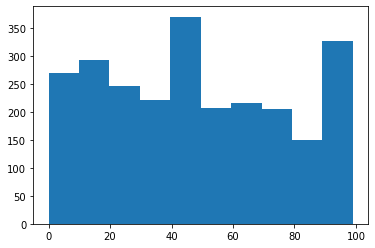

In [48]:
# Look at histogram for target
plt.hist(train.hotel_cluster)

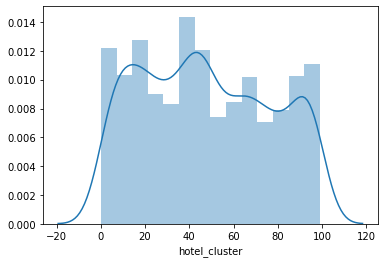

In [49]:
# Histogram was kind of hard to see, so use a different viz
sns.distplot(train.hotel_cluster)

Text(0, 0.5, 'Frequency')

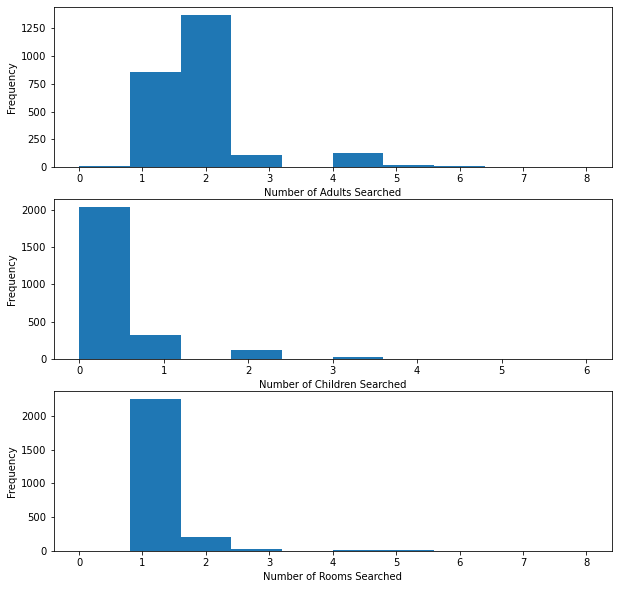

In [50]:
# Look at histograms for multiple features
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

n, bins, patches = ax1.hist(train.srch_adults_cnt)
ax1.set_xlabel('Number of Adults Searched')
ax1.set_ylabel('Frequency')

n, bins, patches = ax2.hist(train.srch_children_cnt)
ax2.set_xlabel('Number of Children Searched')
ax2.set_ylabel('Frequency')

n, bins, patches = ax3.hist(train.srch_rm_cnt)
ax3.set_xlabel('Number of Rooms Searched')
ax3.set_ylabel('Frequency')

(array([27489.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2511.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

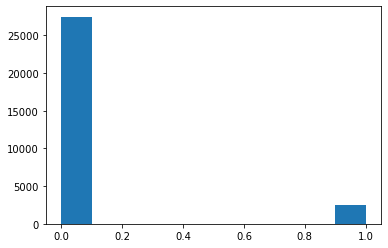

In [3]:
# Since we want to know about hotels that were booked, I want to look at the hist for is_booking (1 = booked)
plt.hist(train.is_booking)

***Conduct Bivariate Analysis***

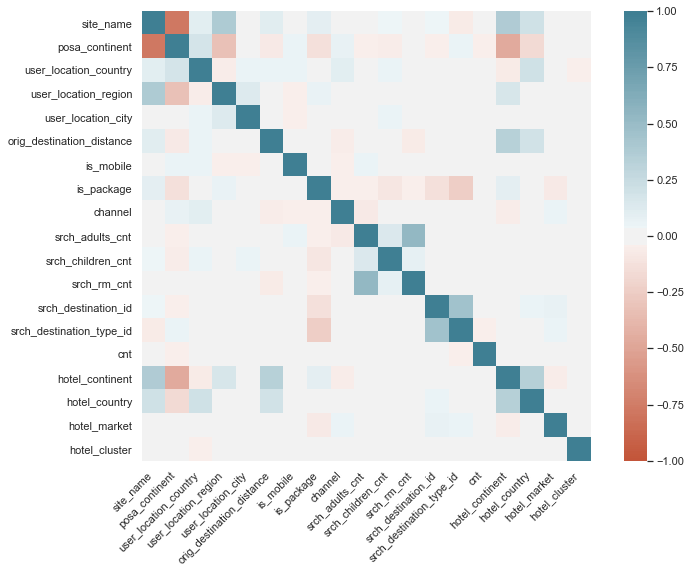

In [51]:
# Look at correlation matrix to see if any relationships stick out
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

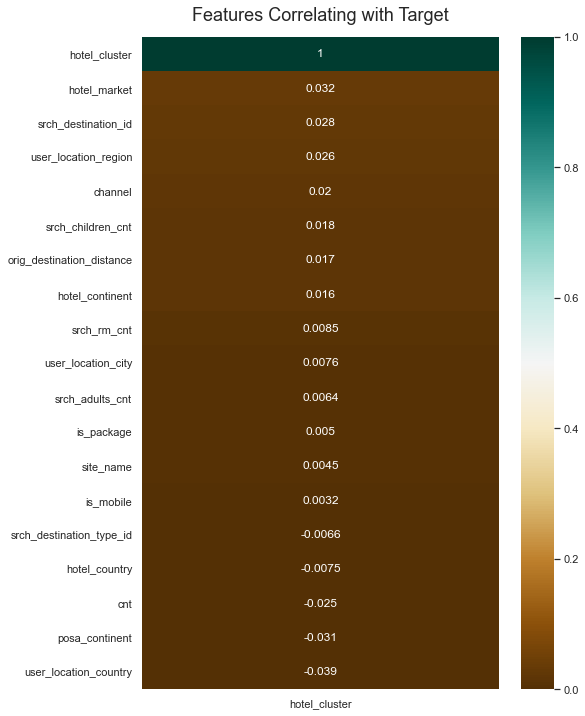

In [52]:
# Look at the correlation scores for each feature to the target
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['hotel_cluster']].sort_values(by='hotel_cluster', ascending=False), vmin=0, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':18}, pad=16);

Text(0.5, 1.0, 'Distance Between Calculation by Hotel Cluster')

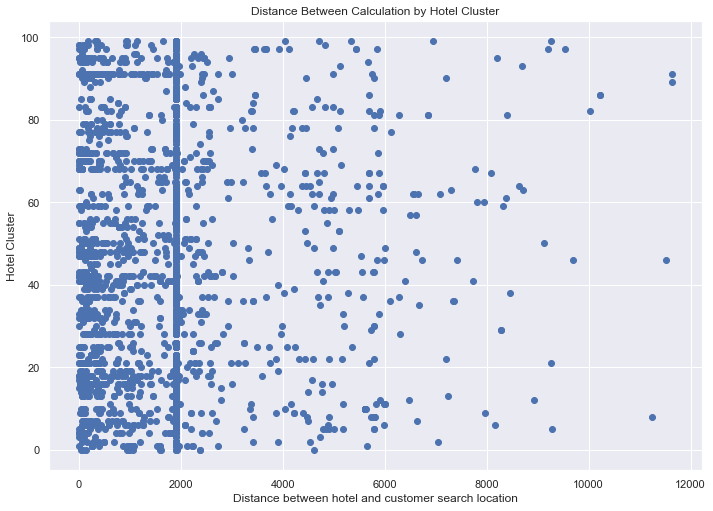

In [53]:
# Look at scatterplot of orig_destination_distance to target to assess relationship
plt.scatter(train.orig_destination_distance, train.hotel_cluster)
plt.xlabel("Distance between hotel and customer search location")
plt.ylabel("Hotel Cluster")
plt.title("Distance Between Calculation by Hotel Cluster")

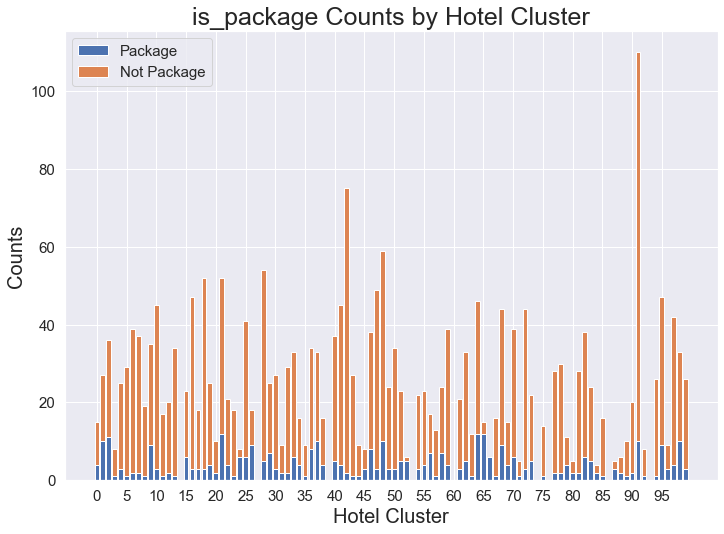

In [54]:
# is_package had the highest correlation with the target. Take a look at the stacked bar charts to compare the binary 
# variables with the target

# make subplots
fig, ax = plt.subplots()

# feed into the visulizer
hotel_cluster_package = train.replace({'is_package': {1: 'is_package', 0: 'not_package'}})[train['is_package']==1]['hotel_cluster'].value_counts()
hotel_cluster_not_package = train.replace({'is_package': {1: 'is_package', 0: 'not_package'}})[train['is_package']==0]['hotel_cluster'].value_counts()
hotel_cluster_not_package = hotel_cluster_not_package.reindex(index = hotel_cluster_package.index)

# make the bar plot
p1 = ax.bar(hotel_cluster_package.index, hotel_cluster_package.values)
p2 = ax.bar(hotel_cluster_not_package.index, hotel_cluster_not_package.values, bottom=hotel_cluster_package.values)
ax.set_title('is_package Counts by Hotel Cluster', fontsize=25)
ax.set_xlabel('Hotel Cluster', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_xticks(np.arange(0, 100, 5))
ax.legend((p1[0], p2[0]), ('Package', 'Not Package'), fontsize = 15)

***Observations upon completion of univariate and bivariate analysis***

There really aren't any strong correlations in the dataset. Especially with the target. The top 5 are: hotel_market, orig_destination_distance, is_package, srch_children_cnt, hotel_continent.

***Data Cleaning & Transformation***

In [4]:
# Check the df for nans
count_nan_in_df = train.isnull().sum()
print (count_nan_in_df)

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    11056
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                         19
srch_co                         19
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64


In [5]:
# Use mean to fill in the average value for orig_destination_distance
train['orig_destination_distance'].fillna(train['orig_destination_distance'].mean(), inplace=True)

In [6]:
# Then remove the srch_ci and srch_co observations that are missing values.
train = train.dropna()  
train.shape

(29981, 24)

In [7]:
# We are interested in predicting the hotel cluster that is booked, therefore keep on is_booking data
train = train.loc[train['is_booking'] == 1]

# Remove is_booking column, no longer needed. Remove user_id & date_time, they don't appear to provide a lot of value.
train = train.drop(['is_booking', 'user_id', 'date_time'], axis=1)

In [8]:
# Let's see how many records we ended up with
train.shape

(2511, 21)

Now since I've cleaned up my data and there is a lot less of it, I'm going to go back and rerun some of my visualizations to see if anything stands out.

Hotel clusters in the 40's and 90's are booked most.
Modes of 2 adults, 0 children, 1 room.
Heavy travel up to a distance of 3,000, then it lightens up.
Huge change in the number of packages booked vs viewed. Turns out a lot of people view packages, but do not book them.

In [9]:
# First Change date columns (srch_ci & srch_co) into datetime objects
#train[["srch_ci", "srch_co"]] = train[["srch_ci", "srch_co"]].apply(pd.to_datetime)

# Verify change
#train.dtypes

# Next, pull out the year and month data from each of the datetime objects
#train['srch_ci_year'] = train['srch_ci'].dt.year
#train['srch_ci_month'] = train['srch_ci'].dt.month
#train['srch_ci_day'] = train['srch_ci'].dt.day
#train['srch_co_year'] = train['srch_co'].dt.year
#train['srch_co_month'] = train['srch_co'].dt.month
#train['srch_co_day'] = train['srch_co'].dt.day

# Then, remove the original columns
train = train.drop(['srch_ci', 'srch_co'], axis=1)

# Lastly, move the target column to the last column in the dataset
#train = train[[c for c in train if c not in ['hotel_cluster']] 
#       + ['hotel_cluster']]
#train.head()

In [10]:
# Split data into features and target data sets
features = train.iloc[: , :-1]
target = train.iloc[:,-1:]

***Feature Selection Using RandomForestClassifier***

In [11]:
# Use RandomForestClassifier for feature selection because the dataset contains both numeric and categorical features
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Specify random forest instance, indicating the number of trees
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))

# Use selectFromModel object to automatically select features
sel.fit(features, target.values.ravel())

# Make a list and count the selected features
selected_feat= features.columns[(sel.get_support())]

print("Best Number of Features: ", len(selected_feat))
print("List of Feature Names: ", selected_feat)

Best Number of Features:  6
List of Feature Names:  Index(['user_location_region', 'user_location_city',
       'orig_destination_distance', 'channel', 'srch_destination_id',
       'hotel_market'],
      dtype='object')


In [12]:
# Create a features dataframe that has the identified best features
best_features = features[['user_location_region', 'user_location_city',
       'orig_destination_distance', 'channel', 'srch_destination_id',
       'hotel_market']]
best_features

,user_location_region,user_location_city,orig_destination_distance,channel,srch_destination_id,hotel_market
1,348,48862,2234.264100,9,8250,628
20,318,52078,1906.567199,4,8291,191
27,548,56440,1906.567199,9,1385,185
72,991,47725,1906.567199,9,8803,69
79,462,41898,2454.858800,1,12009,680
...,...,...,...,...,...,...
29933,288,19207,463.683600,9,11626,668
29936,288,19207,1453.416300,0,5666,552
29953,348,47997,1407.582000,9,8243,409
29963,348,47997,2422.999000,9,8824,118


In [13]:
# reset index
best_features.reset_index(inplace=True, drop=True)
best_features

,user_location_region,user_location_city,orig_destination_distance,channel,srch_destination_id,hotel_market
0,348,48862,2234.264100,9,8250,628
1,318,52078,1906.567199,4,8291,191
2,548,56440,1906.567199,9,1385,185
3,991,47725,1906.567199,9,8803,69
4,462,41898,2454.858800,1,12009,680
...,...,...,...,...,...,...
2506,288,19207,463.683600,9,11626,668
2507,288,19207,1453.416300,0,5666,552
2508,348,47997,1407.582000,9,8243,409
2509,348,47997,2422.999000,9,8824,118


***Feature Selection Using SelectPercentile***
Do not use, just leaving this here in case I need to come back to it

In [89]:
# Remove irrelevant features by calculating the chi-square statistic between each feature and target variable and 
# using it to select the KBest features.
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2, f_classif
#from sklearn.feature_selection import SelectPercentile

# Select top % of features with highest chi2 statistic
#chi2_selector = SelectPercentile(chi2, percentile=10)
#features_kbest = chi2_selector.fit_transform(features, target)

# Show results
#print("Original number of features:", features.shape[1])
#print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 11560
Reduced number of features: 1156


In [90]:
# Get a list of features
#mask = chi2_selector.get_support()
#feature_list = features.columns[mask]

In [91]:
# Create a dataframe from KBest Percentile results
#Kbest_features = pd.DataFrame(features_kbest, columns=feature_list)
#Kbest_features

,orig_destination_distance,srch_children_cnt,site_name_2,site_name_8,site_name_11,site_name_13,site_name_17,site_name_18,site_name_20,site_name_22,...,srch_destination_id_52332,srch_destination_id_52743,srch_destination_id_55535,srch_destination_id_56070,srch_destination_id_56416,srch_destination_id_56825,srch_destination_id_57747,srch_destination_id_58397,srch_destination_id_58680,srch_destination_id_62231
0,2234.264100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014.420353,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014.420353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014.420353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2454.858800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25089,6346.077000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25090,5812.415300,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25091,616.164300,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25092,485.238600,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***Data Transformation for Logistic Regression***
Only use this section when running logistic regression model

In [14]:
# Use variables selected by RandomForestClassifier and one-hot encode the categorical variables
cat_features = ["user_location_region", "user_location_city", "channel", "hotel_market", "srch_destination_id"]
    
# One Hot Encoding 
best_features = pd.get_dummies(best_features, columns = cat_features)

# check the data
print(best_features.head())

   orig_destination_distance  user_location_region_0  user_location_region_9  \
0                2234.264100                       0                       0   
1                1906.567199                       0                       0   
2                1906.567199                       0                       0   
3                1906.567199                       0                       0   
4                2454.858800                       0                       0   

   user_location_region_12  user_location_region_13  user_location_region_14  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   user_location_region_18  user_locat

In [15]:
# Use variables selected by RandomForestClassifier and scale numeric variable
from sklearn.preprocessing import MinMaxScaler
numeric = ["orig_destination_distance"]

#Scale variables
mms = MinMaxScaler()
scaled_dat = mms.fit_transform(best_features[numeric])

# Turn results back into pandas df
scaled_dat = pd.DataFrame(scaled_dat, columns=["orig_destination_distance"])
scaled_dat

,orig_destination_distance
0,0.191922
1,0.163773
2,0.163773
3,0.163773
4,0.210872
...,...
2506,0.039826
2507,0.124846
2508,0.120909
2509,0.208135


In [16]:
# Put the scaled data back into best_features dataframe
best_features["orig_destination_distance"] = scaled_dat
best_features.head()

,orig_destination_distance,user_location_region_0,user_location_region_9,user_location_region_12,user_location_region_13,user_location_region_14,user_location_region_18,user_location_region_20,user_location_region_21,user_location_region_24,...,srch_destination_id_61531,srch_destination_id_61533,srch_destination_id_61702,srch_destination_id_61756,srch_destination_id_61990,srch_destination_id_62927,srch_destination_id_63687,srch_destination_id_63851,srch_destination_id_64627,srch_destination_id_65035
0,0.191922,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.163773,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.163773,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.163773,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.210872,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***Train Test Split***

In [17]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(best_features, target, test_size =0.3, random_state=11)

In [59]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set:  1757
No. of samples in validation set: 754


In [60]:
# Check if training target vector had imbalanced classes
y_train['hotel_cluster'].value_counts()

91    84
42    49
48    40
28    40
47    37
      ..
53     3
66     3
93     3
52     3
71     3
Name: hotel_cluster, Length: 99, dtype: int64

***Modeling***
***Multiclass Classifier Logistic Regression***

In [61]:
# Create baseline regression model for comparison
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(X_train, y_train)
dummy.score(X_val, y_val)

0.007957559681697613

In [18]:
# Build Multiclass Classifier Regression Model accounting for imbalanced classes
from sklearn.linear_model import LogisticRegression

# Create logistic regression object
logit = LogisticRegression(random_state=0, multi_class="ovr", class_weight="balanced", max_iter=1000)

# Train Model
model = logit.fit(X_train, y_train.values.ravel())

# Get R-squared score for model
model.score(X_val, y_val.values.ravel())

0.1724137931034483

In [64]:
# Evaluate model by checking the cross validation scores for logit model
from sklearn.model_selection import cross_val_score

# Cross-validate using accuracy
cvScore = cross_val_score(model, X_val, y_val.values.ravel(), scoring="accuracy")
print("Accuracy CV Scores:", cvScore)
print("Accuracy CV Scores Mean:", cvScore.mean())

C:\Users\myraw\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy CV Scores: [0.13907285 0.09933775 0.15231788 0.17218543 0.12666667]
Accuracy CV Scores Mean: 0.13791611479028698


In [66]:
# Use model to make predictions
target_predicted = model.predict(X_val)

In [67]:
# Create a classification report
from sklearn.metrics import classification_report

print(classification_report(y_val, target_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.36      1.00      0.53         4
           2       0.08      0.10      0.09        10
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         5
           6       0.50      0.17      0.25        12
           7       0.50      0.24      0.32        17
           8       0.25      1.00      0.40         2
           9       0.00      0.00      0.00        10
          10       0.50      0.47      0.48        15
          11       0.14      0.20      0.17         5
          12       0.50      0.22      0.31         9
          13       0.17      0.18      0.17        11
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00        11
          17       0.33    

C:\Users\myraw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myraw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Hyperparameter Tuning Logistic Regression Model***

In [19]:
# Use RandomizedSearchCV to tune hyperparameters because it is computationally cheaper than an exhaustive search.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Create candidates for solver hyperparameter
#solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Create range of candidate regularization penalty hyperparameter values
penalty = ['l1', 'l2']

# Create distribution of candidate regularization hyperparameter values
C = uniform(loc=0, scale=4)
#C = [100, 10, 1.0, 0.1, 0.01]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
#hyperparameters = dict(C=C, penalty=penalty, solver=solver)

# Create randomized search
randomizedsearch = RandomizedSearchCV(logit, hyperparameters, random_state=1, n_iter=100, cv=3, verbose=0, n_jobs=-1)

# Fit randomized search
best_model = randomizedsearch.fit(X_train, y_train.values.ravel())

In [20]:
# View best hyperparameters
best_model.best_params_

{'C': 0.8884981901414992, 'penalty': 'l2'}

In [21]:
# Get R-squared score for best_model and compare to intial model
best_model.score(X_val, y_val.values.ravel())

0.1724137931034483

***Logistic Regression Model Results***

Baseline logistic regression model score: 0.007957559681697613
Default multiclass classifier regression model score: 0.1724137931034483
RandomizedSearchCV model score: 0.1724137931034483

NOTE: I tried to run RandomizedSearchCV with more hyperparameter candidates, but it was running for several hours using all
my CPU and I decided to stop it and reduce the number of hyperparameters. The hyperparameters choosen did not improve results over the default model.

***Modeling***
***Random Forest Regression***

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")

#Train model 
rf_model = randomforest.fit(X_train, y_train.values.ravel())

In [36]:
# view model accuracy score
rf_model.score(X_val, y_val.values.ravel())

0.15251989389920426

In [28]:
# Cross-validate random forest model
from sklearn.model_selection import cross_val_score

cvScore = cross_val_score(rf_model, X_val, y_val.values.ravel(), scoring="accuracy")
print("CV Scores:", cvScore)
print("CV Scores Mean:", cvScore.mean())

C:\Users\myraw\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


CV Scores: [0.1192053  0.10596026 0.12582781 0.13907285 0.12666667]
CV Scores Mean: 0.12334657836644591


***Boosting***

In [29]:
# Try to use boosting in attempt to improve the model
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost tree classifier object
adaboost = AdaBoostClassifier(random_state=0)

# Train model on the important features data set
ab_model = adaboost.fit(X_train, y_train.values.ravel())

# Cross-validate Adaboost model
cvScore = cross_val_score(ab_model, X_val, y_val.values.ravel(), scoring="accuracy")
print("CV Scores:", cvScore)
print("CV Scores Mean:", cvScore.mean())

C:\Users\myraw\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


CV Scores: [0.0397351  0.0397351  0.0397351  0.05298013 0.03333333]
CV Scores Mean: 0.0411037527593819


***Hyperparameter Tuning Random Forest Model***

In [40]:
# Use RandomizedSearchCV to tune hyperparameters because it is computationally cheaper than an exhaustive search.
from sklearn.model_selection import RandomizedSearchCV

# Create range for number of trees in random forest
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

# Create range for number of features to consider at every split
max_features = ['auto', 'sqrt']

# Create range for maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]

# Create range for minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Create range for minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Define method of selecting samples for training each tree
bootstrap = [True, False]

# Create hyperparameter options
hyperparameters = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, 
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, bootstrap=bootstrap)

# Create randomized search
randomizedsearch = RandomizedSearchCV(rf_model, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

# Fit randomized search
best_rf_model = randomizedsearch.fit(X_train, y_train.values.ravel())

C:\Users\myraw\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\myraw\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [42]:
# View best hyperparameters
best_rf_model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [43]:
# Get R-squared score for best_model and compare to intial model
best_rf_model.score(X_val, y_val.values.ravel())

0.14588859416445624

In [45]:
# Create my own random forest classifier combining hyperparameters from multiple RandomizedSearchCV results.
randomforest3 = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced",
                                       n_estimators=1000, max_features=6, min_samples_split=2, min_samples_leaf=1, 
                                       max_depth=60, bootstrap=True)

#Train model 
last_rf_model = randomforest3.fit(X_train, y_train.values.ravel())

last_rf_model.score(X_val, y_val.values.ravel())

0.16710875331564987

***Random Forest Classifier Model Results***

Default rf model score: 0.15251989389920426
Adaboost model score: 0.0411037527593819
RandomizedSearchCV model score: 0.14588859416445624
My rf model score: 0.16710875331564987

When I had run RandomizedSearchCV with numeric options for max_features instead of auto and sqrt, the best result was 6. So I decided to combine hyperparameters from multiple RandomizedSearchCV results and create my own model that returned the best score yet. Yay!